
Exercise 1.

Using the Palmer Penguin dataset (with the species as output variable, and the flipper length, bill length, bill depth and body mass as predictors/ features), compare and contrast the outputs of classification tasks, performed using a cross-validation setting. The cross-validation can be based on a 5-fold setup; repeat the CV on 5 iterations.

In [15]:
import pandas as pd
import seaborn as sns
from palmerpenguins import load_penguins
import matplotlib.pyplot as plt
import numpy as np

In [2]:
penguin = load_penguins()

In [3]:
penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
### Data Cleaning
# Remove rows with missing values
print (penguin.shape)
penguin = penguin.dropna()
print (penguin.shape)

(344, 8)
(333, 8)


In [5]:
### Assign X and y
y = penguin['species'].to_numpy()
X = penguin[['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm', 'body_mass_g']].to_numpy()

In [7]:
### Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
### When scaling, we only scale the training data, calculate the mean and standard dev
### We should scale the test set using the mean and std dev from the training
### Use the standard scaler from sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

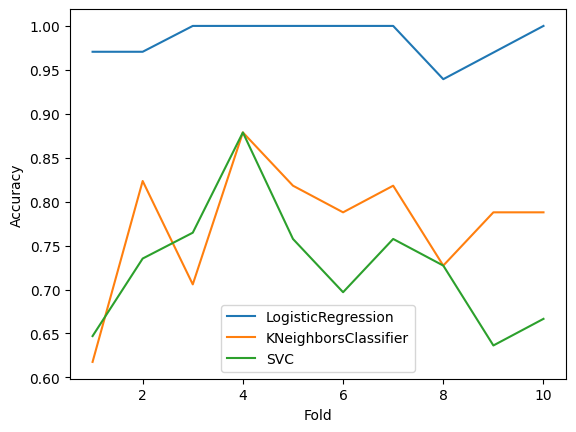

In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
### Logistic Regression
from sklearn.linear_model import LogisticRegression
### K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
### Support Vector Machine
from sklearn.svm import SVC

### Grid search
from sklearn.model_selection import GridSearchCV

model_list = [LogisticRegression, KNeighborsClassifier, SVC]

initial_params = [{},{},{}]

# Number of folds
k = 10

# Initialize the KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Loop through each model
for i in range(0, len(model_list)):
    
    # Initialize a list to store the evaluation results
    accuracy_scores = []
    model = model_list[i](**initial_params[i]) ### Here, how to find the best parameters?
    
    # Loop through each fold
    for j, (train_index, test_index) in enumerate(kf.split(X)):
        # Split the data into training and testing sets for this fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Make predictions on the testing data
        y_pred = model.predict(X_test)

        # Calculate and store the accuracy for this fold
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
    
    sns.lineplot(x=range(1, k+1), y=accuracy_scores, label=model_list[i].__name__)

# Calculate the mean and standard deviation of the accuracy scores
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
# Print the results
# print("Accuracy Scores:", accuracy_scores)
# print("Mean Accuracy:", mean_accuracy)
# print("Standard Deviation:", std_deviation)


In [18]:
param_grid = [
    {
        # Logistic Regression
        # 'solver': ['liblinear'],
        'C': np.linspace(0.1, 10, 100),
    },
    {
        # K Nearest Neighbors
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    {
        # Support Vector Machine
        'C': np.linspace(0.1, 10, 100),
        'kernel': ['linear', 'rbf']
    }
]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

{'C': 1.0}
0.9881461675579324
{'n_neighbors': 3, 'weights': 'distance'}
0.8231729055258465


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'C': 0.5, 'kernel': 'linear'}
0.9909982174688057


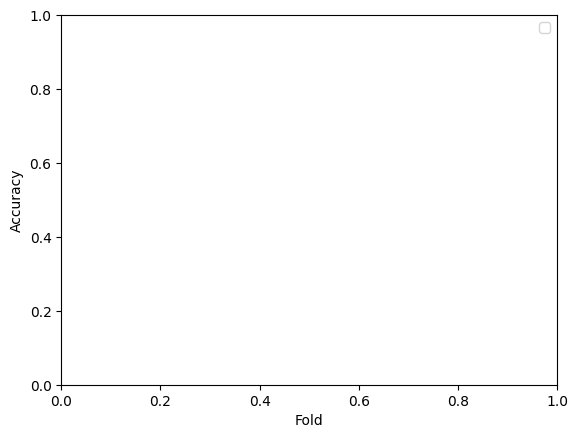

In [19]:
# Loop through each model

model_list = [LogisticRegression, KNeighborsClassifier, SVC]
for i in range(0, len(model_list)):
    
    # Initialize a list to store the evaluation results
    accuracy_scores = []
    model = model_list[i] ### Here, how to find the best parameters?
    
    # Fit the model on the training data

    grid_search = GridSearchCV(estimator=model(), param_grid=param_grid[i], cv=10)

    grid_search.fit(X, y)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_

    # Make predictions on the testing data
    print(best_params)
    y_pred = grid_search.best_estimator_.predict(X_test)

    # Calculate and store the accuracy for this fold
    print (best_score)
    
    # sns.lineplot(x=range(1, k+1), y=accuracy_scores, label= f"{model_list[i].__name__}, {best_params}")

# Calculate the mean and standard deviation of the accuracy scores
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
### cross validation

from sklearn.model_selection import cross_val_score

### Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

The classification approaches to be compared are:

[a] Discriminative approaches

 [a1] Logistic regression


 [a2] Nearest neighbours



 [a3] Support vector machines

